# Part 4: Word frequency over time (Extra Credit)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

plt.style.use('seaborn-v0_8-dark')

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
df = pd.read_csv("data/SOTU.csv")
df.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


In [7]:
from collections import Counter

def count_word_frequencies_over_time(df, target_words):
    """
    df: full SOTU dataframe
    target_words: list of words (use lemmas)
    
    returns a dataframe with columns:
    Year, word1, word2, ...
    """
    
    target_words = [w.lower() for w in target_words]
    
    results = []

    for year in sorted(df['Year'].unique()):
        speeches = df[df['Year'] == year]['Text']

        full_text = " ".join(speeches)

        doc = nlp(full_text)

        lemmas = [token.lemma_.lower() 
                  if not token.is_stop and not token.is_punct and not token.is_space 
                  else None
                  for token in doc]

        lemma_counts = Counter([lemma for lemma in lemmas if lemma is not None])

        row = {'Year': year}
        for w in target_words:
            row[w] = lemma_counts[w]
        
        results.append(row)

    return pd.DataFrame(results)


In [8]:
target_words = ["america", "economy", "job"]
freq_df = count_word_frequencies_over_time(df, target_words)
freq_df.head()

,Year,america,economy,job
0,1790.0,0,4,0
1,1791.0,0,0,0
2,1792.0,0,0,0
3,1793.0,0,1,0
4,1794.0,0,1,0


In [17]:
import os

if not os.path.exists("outputs"):
    os.makedirs("outputs")


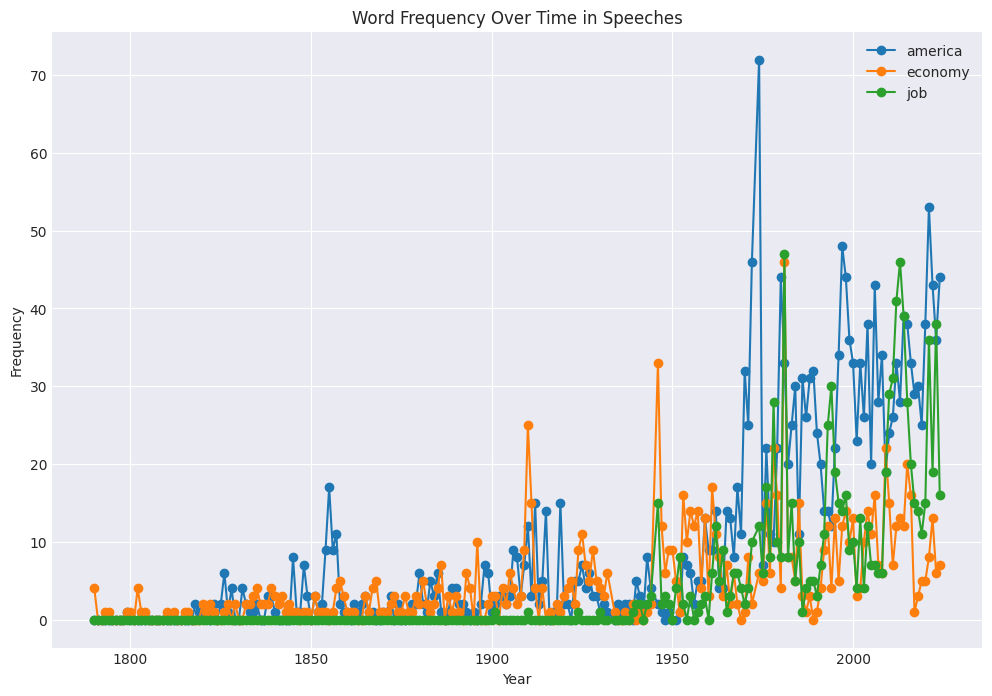

In [18]:
plt.figure(figsize=(12,8))

for word in target_words:
    plt.plot(freq_df["Year"], freq_df[word], marker='o', label=word)

plt.legend()
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Word Frequency Over Time in Speeches")
plt.grid(True)
plt.savefig("outputs/word_frequency_plot.png")
plt.show()

freq_df.to_csv("outputs/word_frequency_over_time.csv", index=False)

### From the graph, we can see that the words “america,” “economy,” and “job” appear very rarely in early speeches but become much more common in the mid-1900s and especially in recent years. “America” rises the most, showing that presidents talk more about national identity over time. “Economy” and “job” also increase, suggesting a growing focus on economic and financial issues.